In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Airline Quality Ratings.csv')


In [81]:
df['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [82]:
df.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [83]:
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [84]:
median_value = df['Arrival Delay'].median()

# Заполняем NaN медианой
df['Arrival Delay'] = df['Arrival Delay'].fillna(median_value)

In [85]:
df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [86]:
df = pd.get_dummies(df, columns=['Gender','Customer Type', 'Type of Travel', 'Class', ], drop_first=True)

In [87]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


le = LabelEncoder()
df['Satisfaction_label'] = le.fit_transform(df['Satisfaction'])

scaler = MinMaxScaler(feature_range=(1, 5))
df['Satisfaction_reg'] = scaler.fit_transform(df[['Satisfaction_label']])

In [88]:
df = df.drop(columns=['Satisfaction_label'])

df.head()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,...,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction_reg
0,1,48,821,2,5.0,3,3,4,3,3,...,3,5,5,Neutral or Dissatisfied,True,False,False,False,False,1.0
1,2,35,821,26,39.0,2,2,3,5,2,...,2,5,5,Satisfied,False,True,False,False,False,5.0
2,3,41,853,0,0.0,4,4,4,5,4,...,4,3,3,Satisfied,True,True,False,False,False,5.0
3,4,50,1905,0,0.0,2,2,3,4,2,...,2,5,5,Satisfied,True,True,False,False,False,5.0
4,5,49,3470,0,1.0,3,3,3,5,3,...,3,3,3,Satisfied,False,True,False,False,False,5.0


In [89]:
X = df.drop(columns=['Satisfaction', 'Satisfaction_reg', 'ID'])
y = df['Satisfaction_reg']

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [91]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# ==== 3. Вероятности ====
probs = clf.predict_proba(X_test)[:, 1]  # P(доволен)

# ==== 4. Превращаем в шкалу 1–5 ====
scores = 1 + 4 * probs  # линейное преобразование

# ==== 5. Пример ====
for i in range(5):
    print(f"P(доволен) = {probs[i]:.3f}, score = {scores[i]:.2f}")

P(доволен) = 0.000, score = 1.00
P(доволен) = 1.000, score = 5.00
P(доволен) = 0.960, score = 4.84
P(доволен) = 0.290, score = 2.16
P(доволен) = 0.970, score = 4.88


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.3f}, R2: {r2:.3f}')

MSE: 0.449, R2: 0.886


In [93]:
results = pd.DataFrame({
    'Actual_Satisfaction': y_test.values,
    'Predicted_Satisfaction': y_pred
})

# Можно посмотреть первые 10 строк
print(results.head(10))

   Actual_Satisfaction  Predicted_Satisfaction
0                  1.0                     1.0
1                  5.0                     5.0
2                  5.0                     5.0
3                  5.0                     2.6
4                  5.0                     5.0
5                  1.0                     1.0
6                  1.0                     1.0
7                  5.0                     5.0
8                  1.0                     1.0
9                  5.0                     5.0


In [94]:
# ==== 1. Обучаем модель на train ====
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# ==== 2. Функция преобразования в 5-балльную шкалу ====
def predict_satisfaction(model, X):
    """
    Превращает бинарную классификацию (доволен/не доволен)
    в 5-балльную шкалу с текстовой категорией.
    """
    # Вероятность класса "доволен" (1)
    probs = model.predict_proba(X)[:, 1]
    
    # Переводим вероятность в шкалу 1–5
    scores = 1 + 4 * probs  
    
    # Категоризация
    def categorize(score):
        if score < 2:
            return "очень недоволен"
        elif score < 3:
            return "недоволен"
        elif score < 4:
            return "нейтрал"
        elif score < 4.5:
            return "доволен"
        else:
            return "очень доволен"
    
    categories = [categorize(s) for s in scores]
    return scores, categories

# ==== 3. Применяем на тесте ====
scores, categories = predict_satisfaction(clf, X_test)

# ==== 4. Смотрим примеры ====
import pandas as pd

results = pd.DataFrame({
    "True_Label": y_test,
    "Score": scores,
    "Category": categories
})

print(results.head(10))

        True_Label  Score         Category
103044         1.0   1.00  очень недоволен
43282          5.0   5.00    очень доволен
65543          5.0   4.84    очень доволен
65083          5.0   2.16        недоволен
76496          5.0   4.88    очень доволен
78319          1.0   1.04  очень недоволен
43712          1.0   1.00  очень недоволен
8092           5.0   4.92    очень доволен
105253         1.0   1.00  очень недоволен
71027          5.0   4.96    очень доволен


   Actual_Satisfaction  Linear Regression_Predicted  Random Forest_Predicted  \
0                  1.0                         1.47                      1.0   
1                  5.0                         4.35                      5.0   
2                  5.0                         4.24                      5.0   
3                  5.0                         1.32                      2.6   
4                  5.0                         3.34                      5.0   
5                  1.0                         2.98                      1.0   
6                  1.0                         0.27                      1.0   
7                  5.0                         5.02                      5.0   
8                  1.0                         1.22                      1.0   
9                  5.0                         5.09                      5.0   

   Gradient Boosting_Predicted  
0                         0.92  
1                         4.96  
2                   

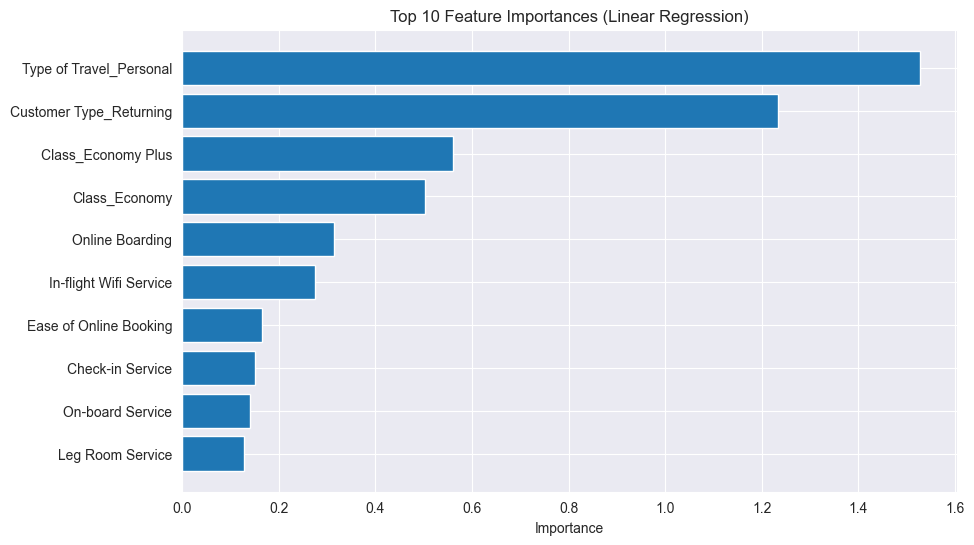

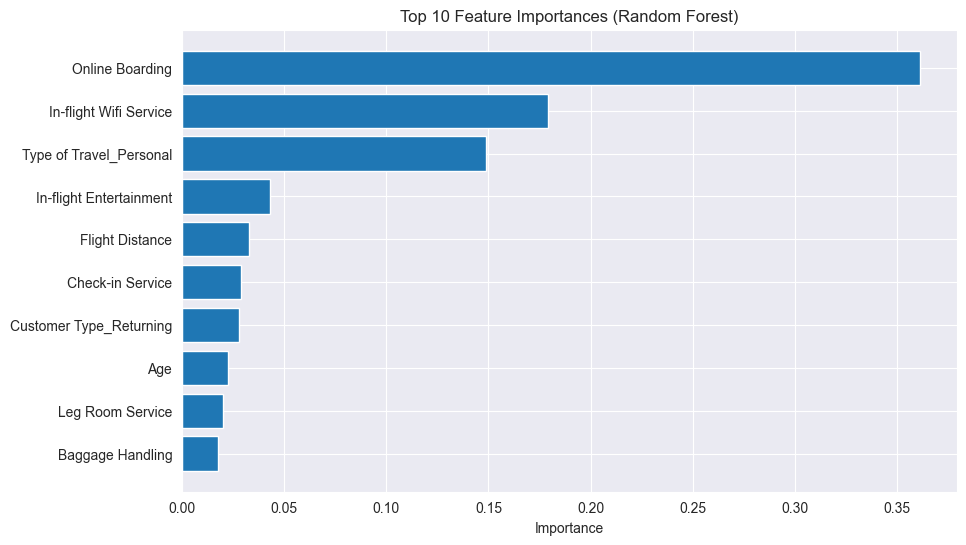

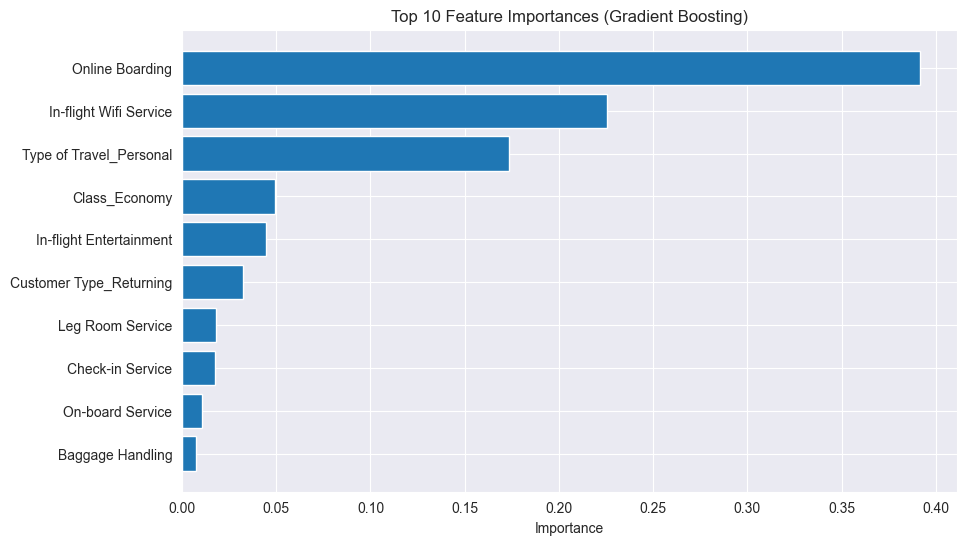

In [95]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)  # метод опорных векторов
}

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

results = pd.DataFrame({'Actual_Satisfaction': y_test.values})

feature_importances = {}  # словарь для важности признаков

for name, model in models.items():
    if name == 'SVR':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        # Permutation importance для SVR
        perm = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)
        imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': perm.importances_mean}).sort_values(by='Importance', ascending=False)
    elif name in ['Random Forest', 'Gradient Boosting']:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
    else:  # Linear Regression
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': abs(model.coef_)}).sort_values(by='Importance', ascending=False)
    
    # Сохраняем важность признаков
    feature_importances[name] = imp_df

    # Добавляем предсказания в таблицу
    results[name + '_Predicted'] = y_pred.round(2)
    
print(results.head(10))

for name, model in models.items():
    if name == 'SVR':
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MSE={mse:.3f}, R2={r2:.3f}")
    
for name, imp_df in feature_importances.items():
    plt.figure(figsize=(10,6))
    plt.barh(imp_df['Feature'].head(10), imp_df['Importance'].head(10))
    plt.gca().invert_yaxis()
    plt.xlabel('Importance')
    plt.title(f'Top 10 Feature Importances ({name})')
    plt.show()    
    

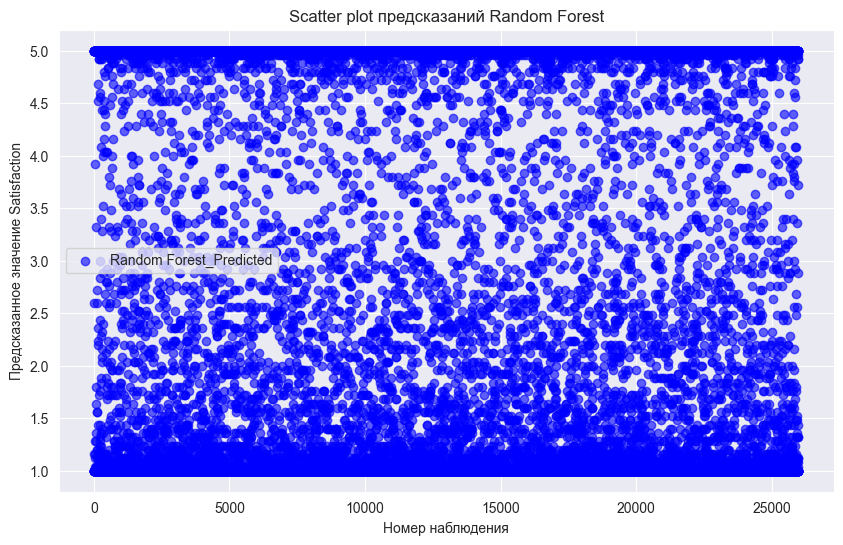

In [98]:
plt.figure(figsize=(10,6))

plt.scatter(results.index, results['Random Forest_Predicted'], color='blue', alpha=0.6, label='Random Forest_Predicted')

plt.xlabel("Номер наблюдения")
plt.ylabel("Предсказанное значение Satisfaction")
plt.title("Scatter plot предсказаний Random Forest")
plt.legend()
plt.show()